Importing sufficient modules for the program

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

Loading the raw data from the github to a dataframe and then print the data

In [2]:
# Load data from the provided URL
url = 'https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv'
Data = pd.read_csv(url, sep=',')
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Describing the dataframe in form of generating the descriptive statistics

In [3]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03
mean,105.797199,107.959321,103.485805,105.853488,105.853488,3.145634e+07
std,188.691743,192.434544,184.592519,188.788993,188.788993,2.845125e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.352000,10.748000,10.132000,10.400000,10.400000,1.252200e+07
50%,45.868000,46.493999,45.099998,45.902000,45.902000,2.482100e+07
75%,65.000000,66.251999,63.993999,65.234001,65.234001,4.014650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


First we convert the date column to a pandas datetime object. Then we calculate the number of days since first day of dataset, which we later will use to check how accurate the analysis is for a certain date.

In [4]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Days'] = (Data['Date'] - Data['Date'].min()).dt.days

Creating a plot for the close price according to the dataframe.

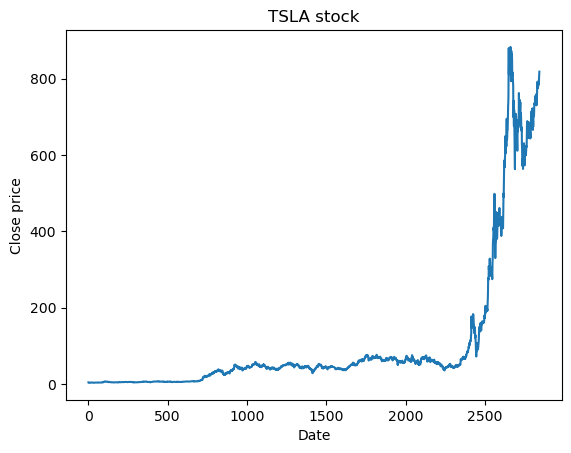

In [5]:
Close = Data['Close']
ax = Close.plot(title='TSLA stock')
ax.set_xlabel('Date')
ax.set_ylabel('Close price')
plt.show()

Now we prepare for the regression, by splitting the dataframe to x and y.

In [6]:
X = Data[['Days']].values
Y = Data['Close']

Split the data into the training sets. Test size 0.2 says that 20% of the data will be used for modelling, the last 80% will be used for training. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Initialize and train the linear regression model.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Input, will ask the user for a specific date for prediction

In [9]:
user_date = input("Enter a date (yyyy-mm-dd) for stock price prediction: ")
user_date_datetime = pd.to_datetime(user_date)

Enter a date (yyyy-mm-dd) for stock price prediction: 2014-12-12


First we find the closest date in the datset, then we predict the price.

In [10]:
closest_date = Data['Date'].iloc[(Data['Date'] - user_date_datetime).abs().argsort()[0]]
predicted_price = model.predict([[Data[Data['Date'] == closest_date]['Days'].values[0]]])[0]

First we calculate the actual price for the closest date, then we calculate the prediction percentage score and finally print the prediciton price, actual price and prediction percentage score.

In [11]:
actual_price = Data[Data['Date'] == closest_date]['Close'].values[0]
percentage_score = (predicted_price / actual_price) * 100
print(f"Predicted Price: ${predicted_price:.2f}")
print(f"Actual Price: ${actual_price:.2f}")
print(f"Prediction Percentage Score: {percentage_score:.2f}%")

Predicted Price: $61.14
Actual Price: $41.40
Prediction Percentage Score: 147.68%
